In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# **EDA**

In [5]:
# check for null values
high_nan_value = []
for i,j in df.isnull().sum().items():
    if j>0:
        print(f"{i} -------> {round((j/df.shape[0])*100,2)}")
        if j>50:
            high_nan_value.append(i)
print(f"\nMore than 50% nan value columns are----> ",len(high_nan_value))

LotFrontage -------> 17.74
Alley -------> 93.77
MasVnrType -------> 59.73
MasVnrArea -------> 0.55
BsmtQual -------> 2.53
BsmtCond -------> 2.53
BsmtExposure -------> 2.6
BsmtFinType1 -------> 2.53
BsmtFinType2 -------> 2.6
Electrical -------> 0.07
FireplaceQu -------> 47.26
GarageType -------> 5.55
GarageYrBlt -------> 5.55
GarageFinish -------> 5.55
GarageQual -------> 5.55
GarageCond -------> 5.55
PoolQC -------> 99.52
Fence -------> 80.75
MiscFeature -------> 96.3

More than 50% nan value columns are---->  12


In [6]:
df.drop(high_nan_value,axis=1,inplace=True)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
missing_value_columns = []
for i,j in df.isnull().sum().items():
    if j>0:
        print(f"{i} -------> {round((j/df.shape[0])*100,2)}")
        missing_value_columns.append(i)

MasVnrArea -------> 0.55
BsmtQual -------> 2.53
BsmtCond -------> 2.53
BsmtExposure -------> 2.6
BsmtFinType1 -------> 2.53
BsmtFinType2 -------> 2.6
Electrical -------> 0.07


In [9]:
missing_value_columns

['MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [10]:
df[missing_value_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrArea    1452 non-null   float64
 1   BsmtQual      1423 non-null   object 
 2   BsmtCond      1423 non-null   object 
 3   BsmtExposure  1422 non-null   object 
 4   BsmtFinType1  1423 non-null   object 
 5   BsmtFinType2  1422 non-null   object 
 6   Electrical    1459 non-null   object 
dtypes: float64(1), object(6)
memory usage: 80.0+ KB


In [11]:
for i,j in df.isnull().sum().items():
    if j>0:
        if df[i].dtype == object:
            df[i].fillna(df[i].mode()[0],inplace=True)
        else:
            df[i].fillna(df[i].median(),inplace=True)

In [12]:
df.isnull().sum().sum()

0

# **Outliers**

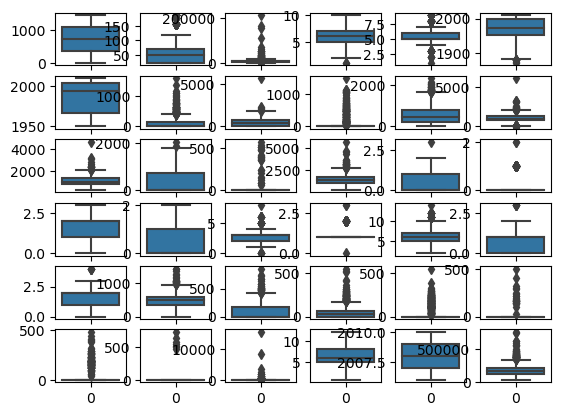

In [13]:
# Plot boxplots for numerical columns
num_columns = [i for i in df.columns if df[i].dtype != object]

x = 0
for i in num_columns:
    x += 1
    plt.subplot(6, 6, x)
    sns.boxplot(df[i])
        
plt.show()

# Apply outlier removal using IQR for columns in 'yo'
for i in num_columns:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_boundary = df[i].quantile(0.25) - (iqr * 1.5)
    upper_boundary = df[i].quantile(0.75) + (iqr * 1.5)
        
        # Clip outliers
    df[i] = df[i].clip(lower=lower_boundary, upper=upper_boundary)

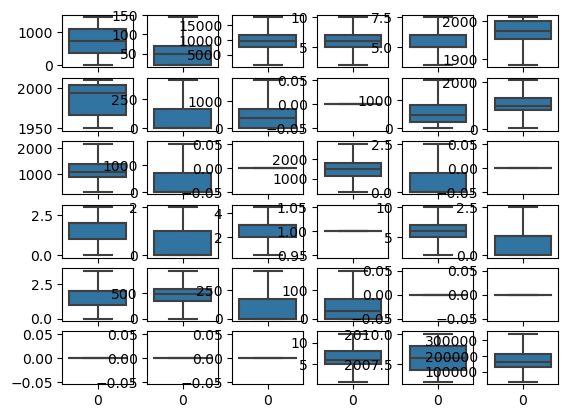

In [14]:
x = 0
for i in num_columns:
    x += 1
    plt.subplot(6, 6, x)
    sns.boxplot(df[i])
        
plt.show()

# **Data Transformation**

In [15]:
import statsmodels.api as sm

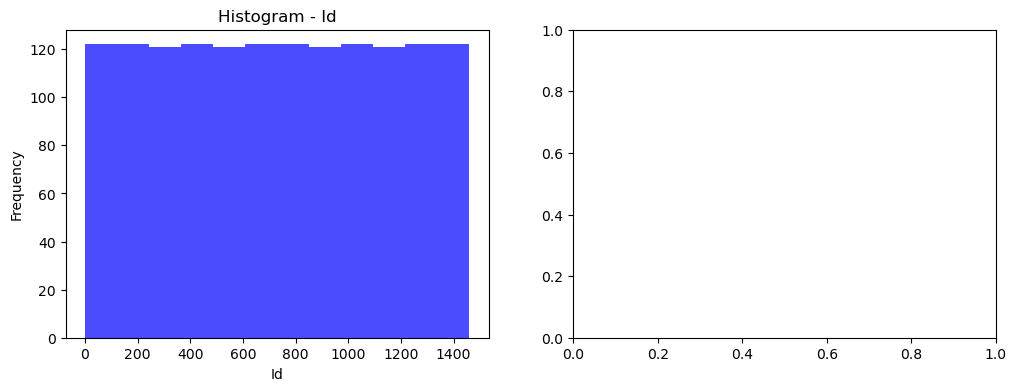

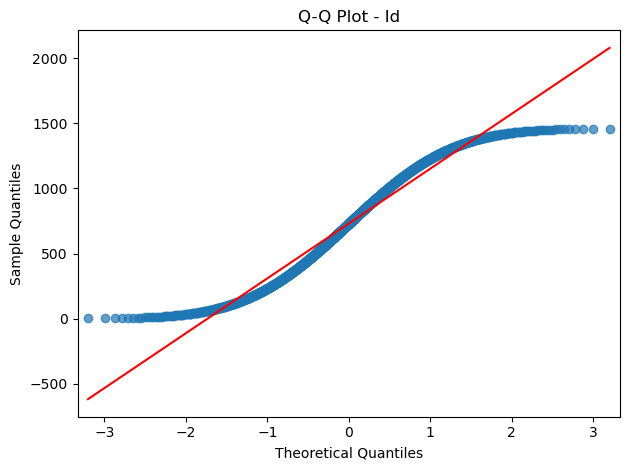

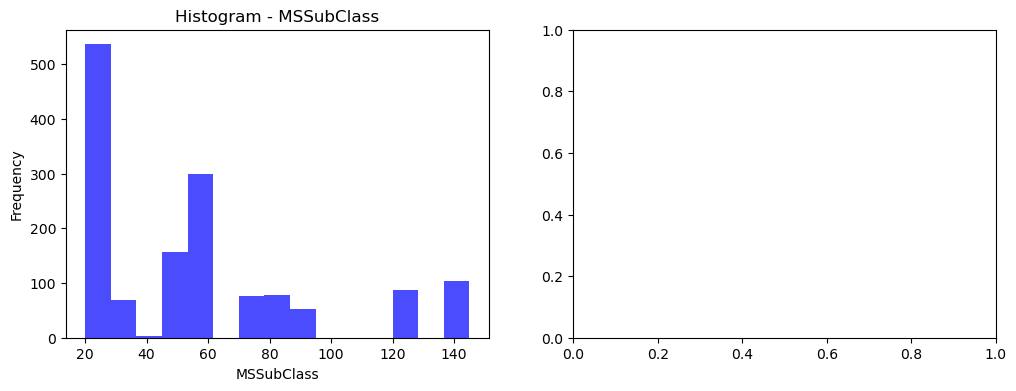

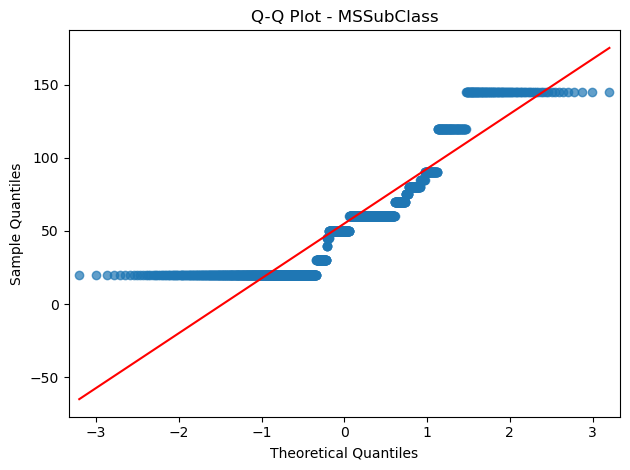

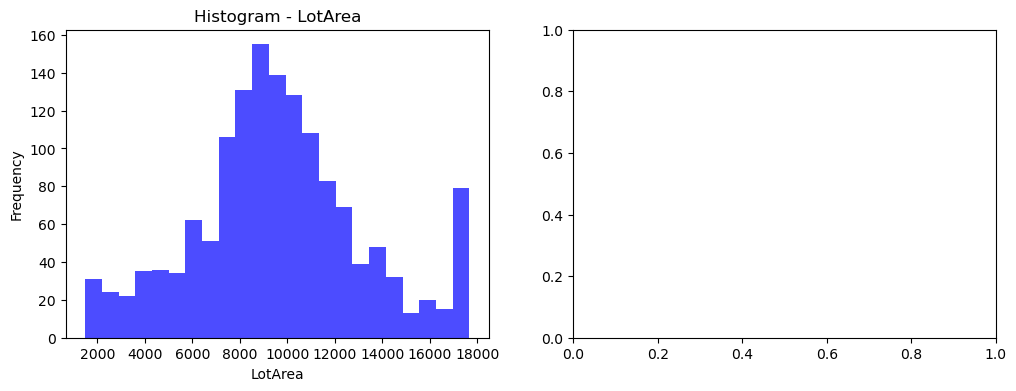

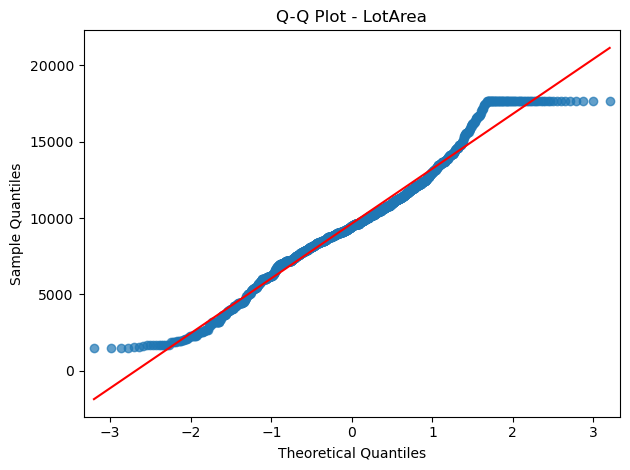

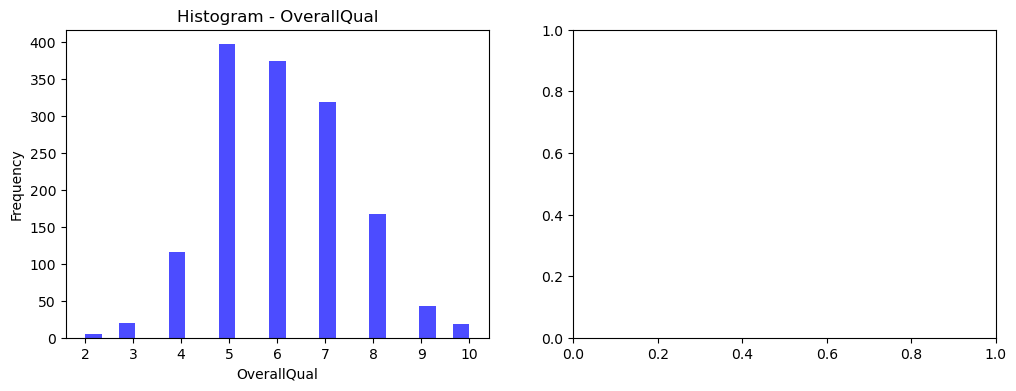

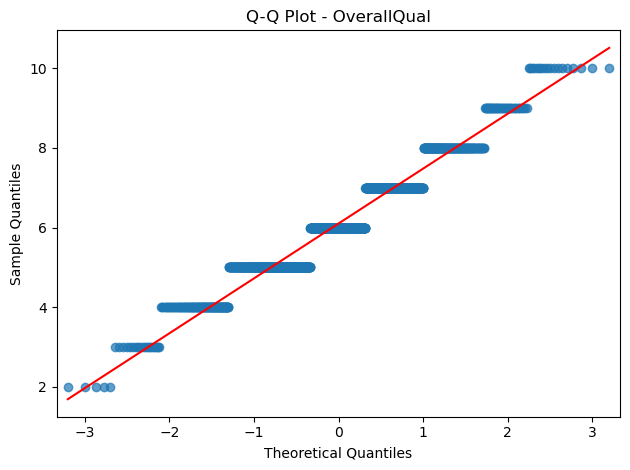

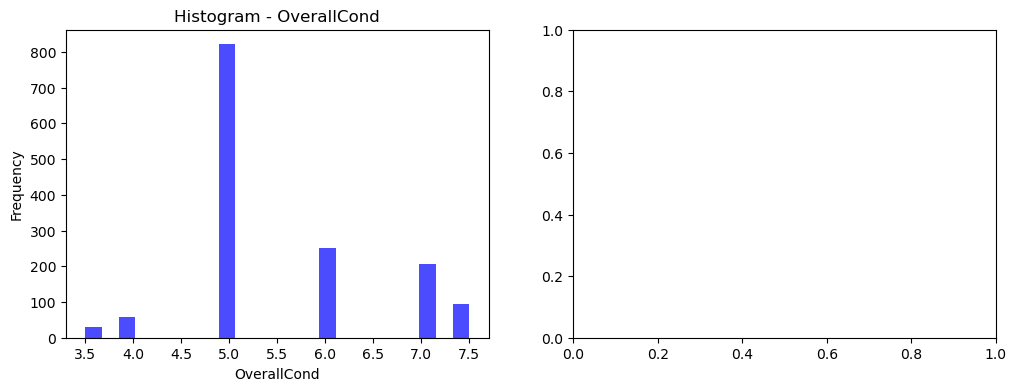

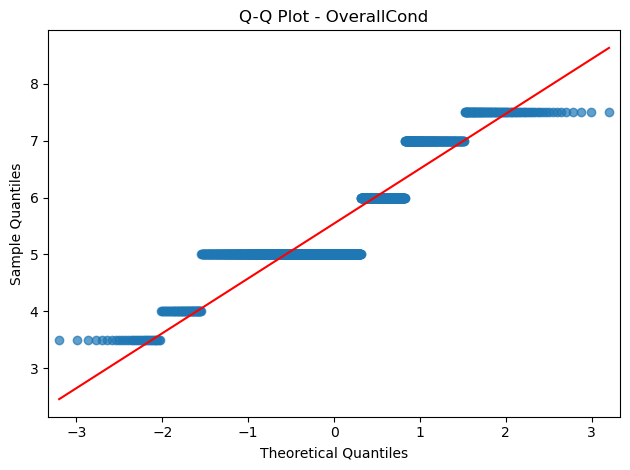

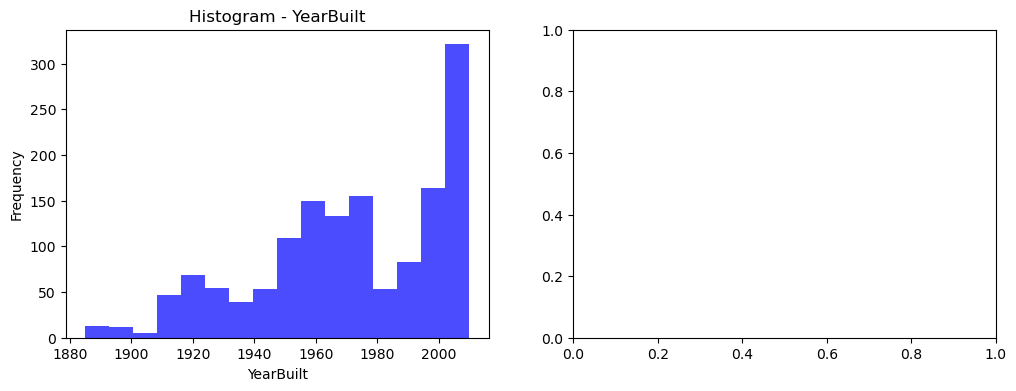

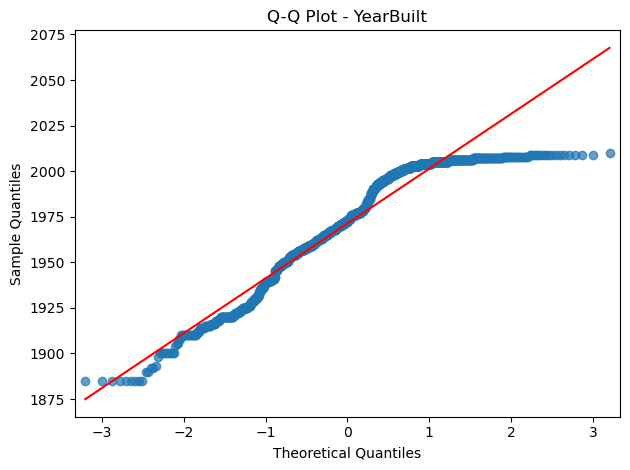

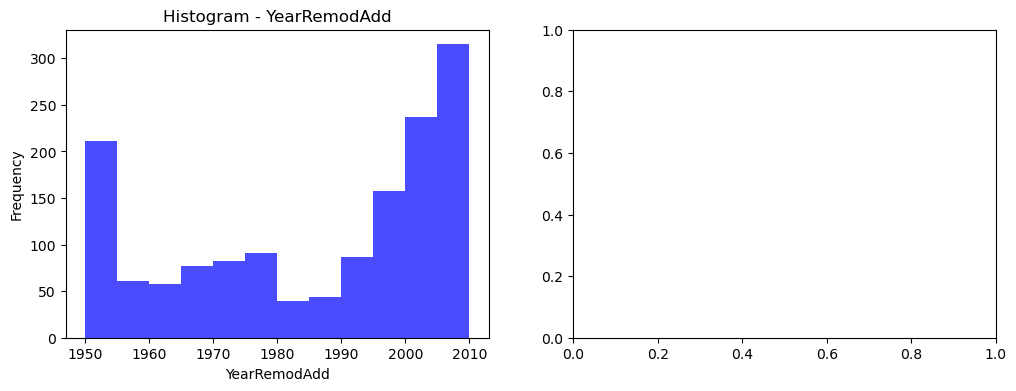

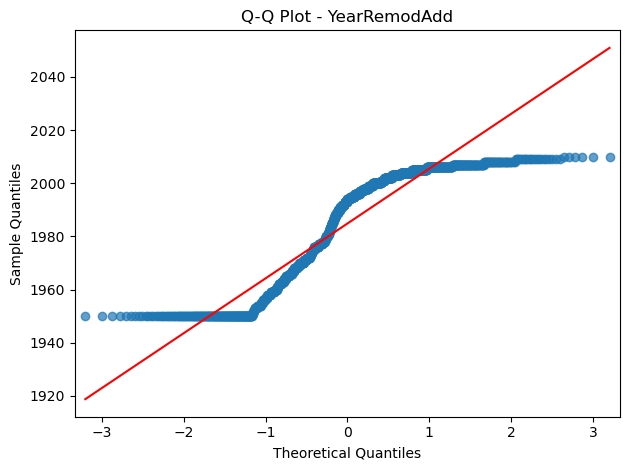

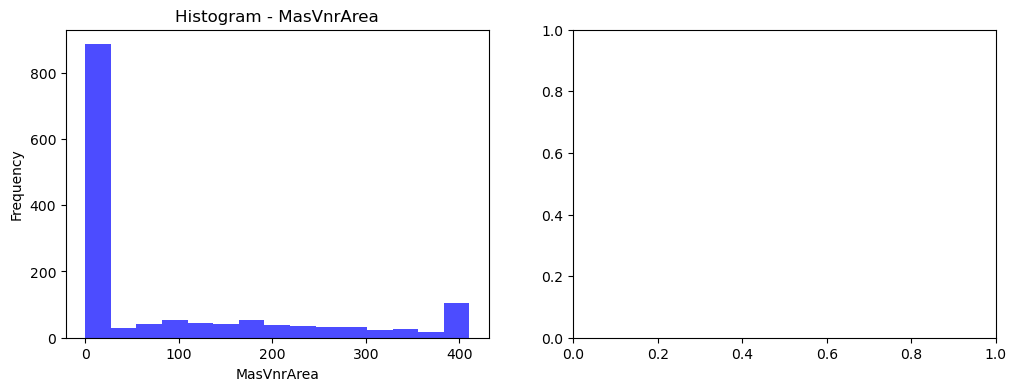

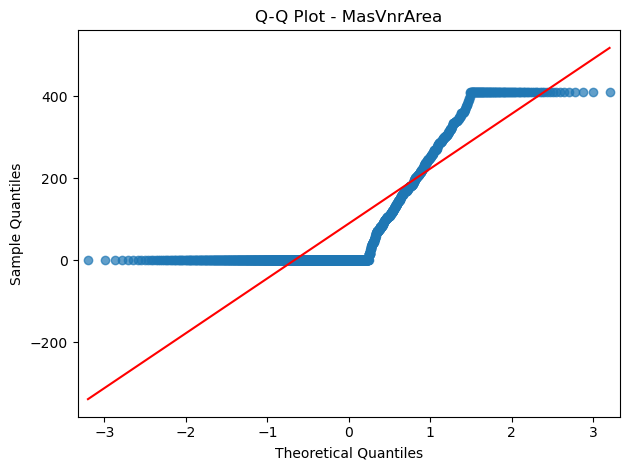

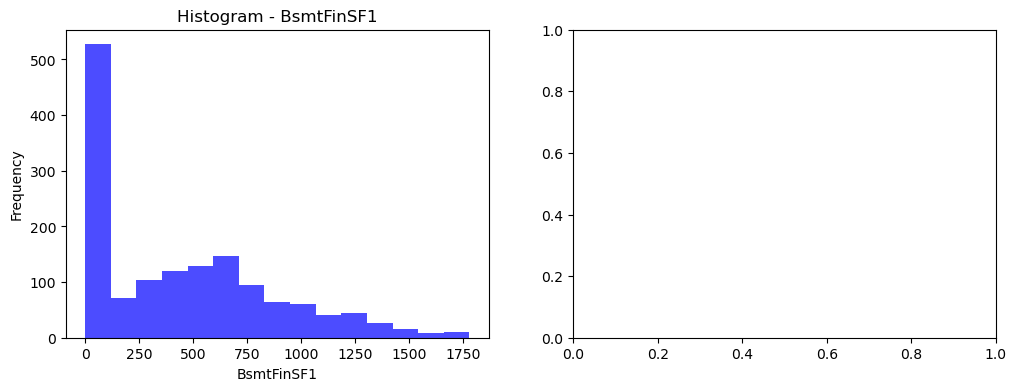

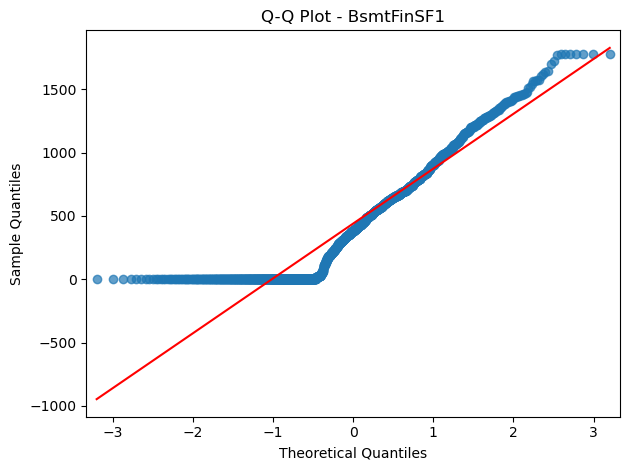

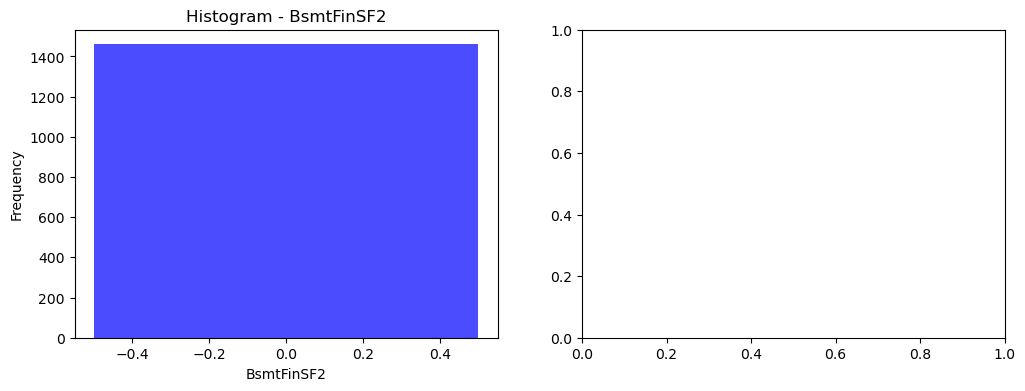

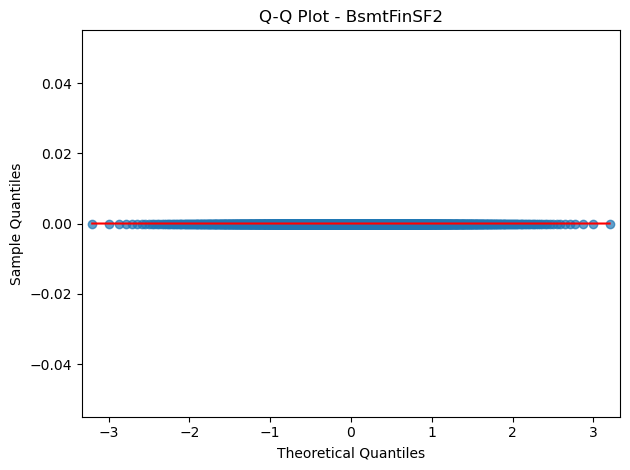

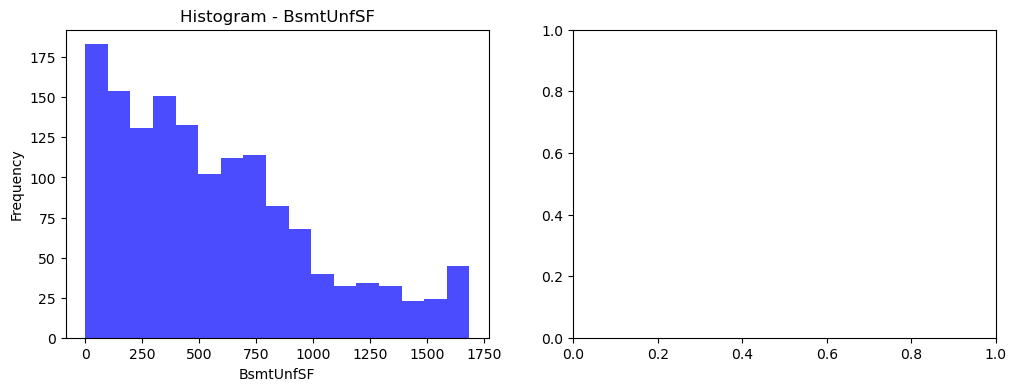

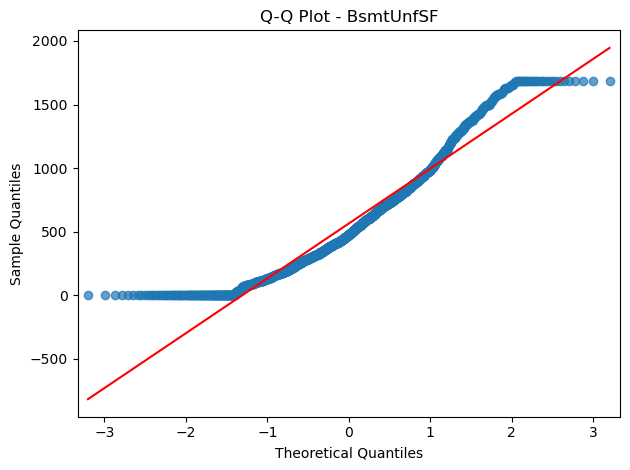

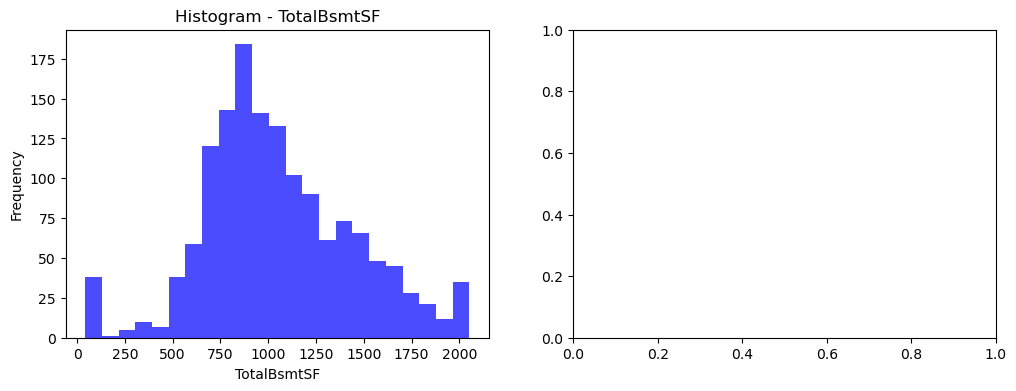

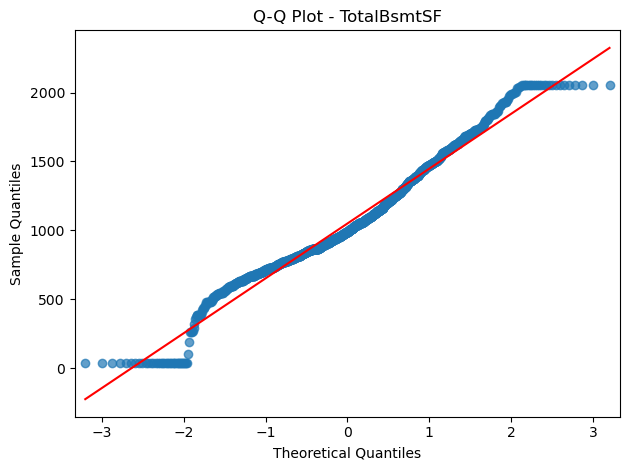

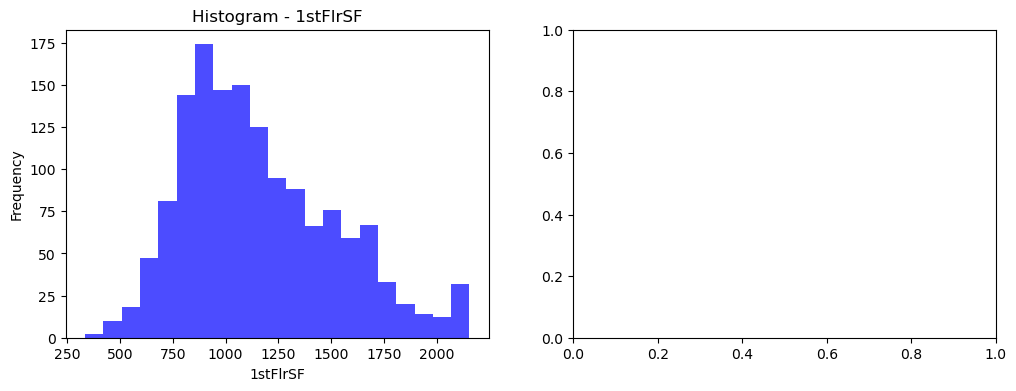

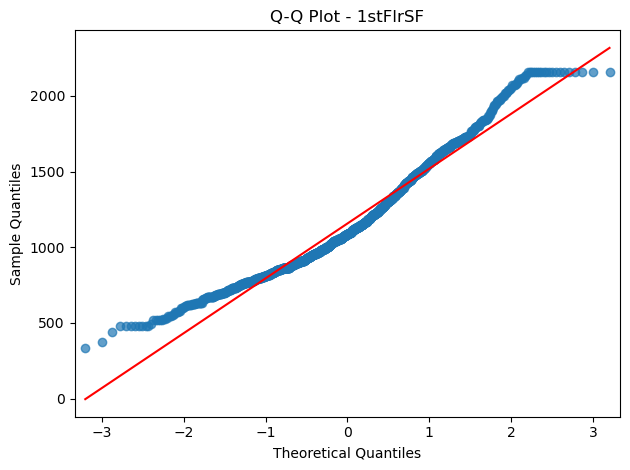

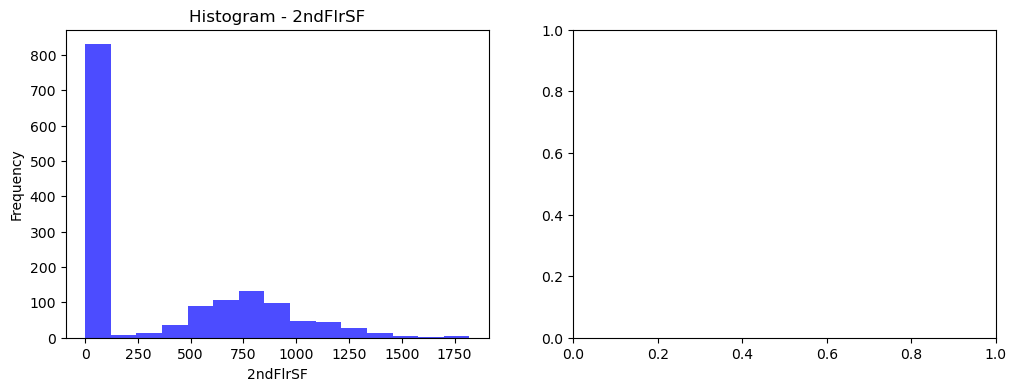

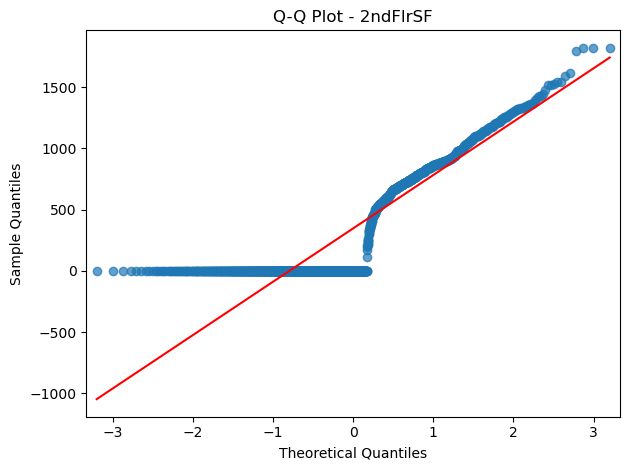

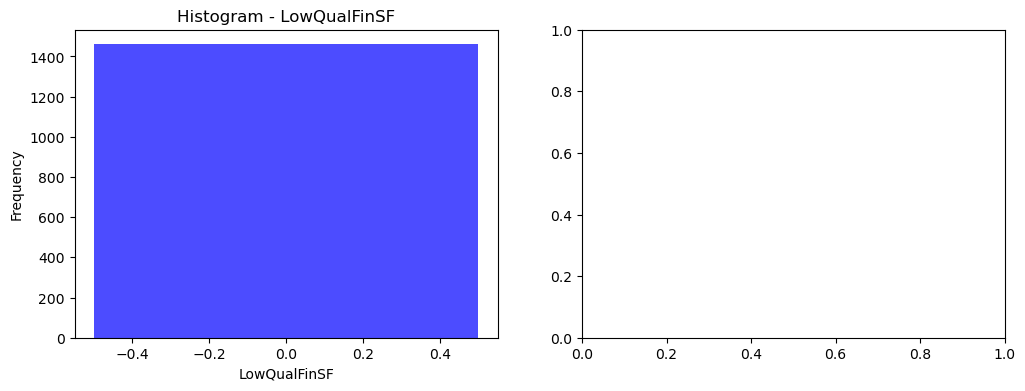

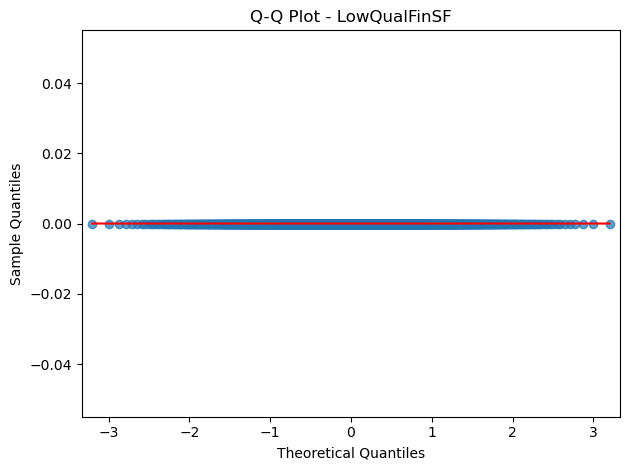

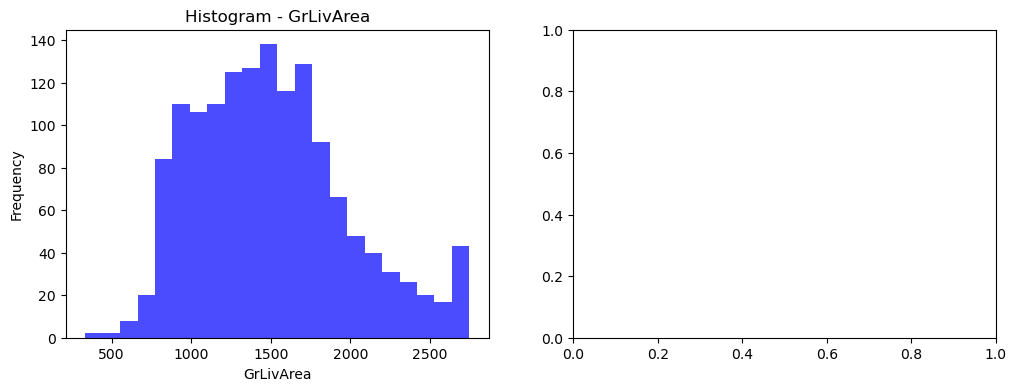

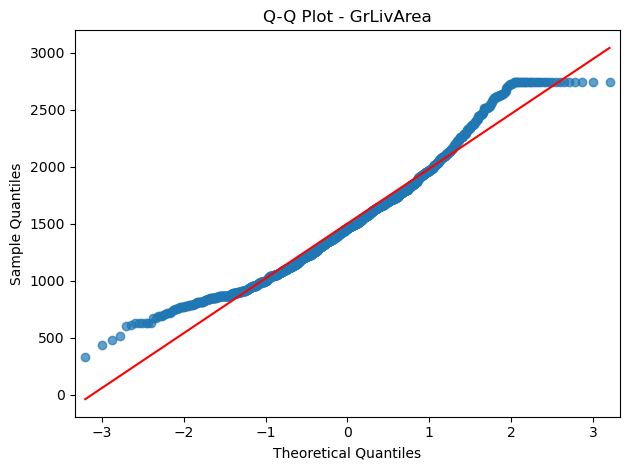

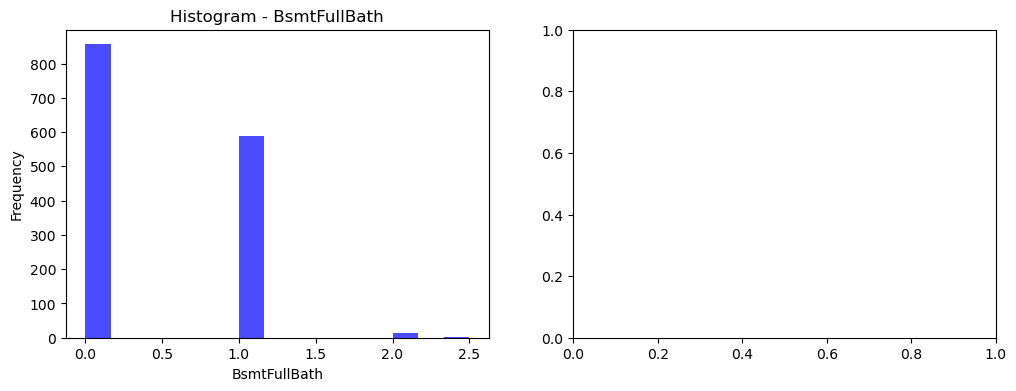

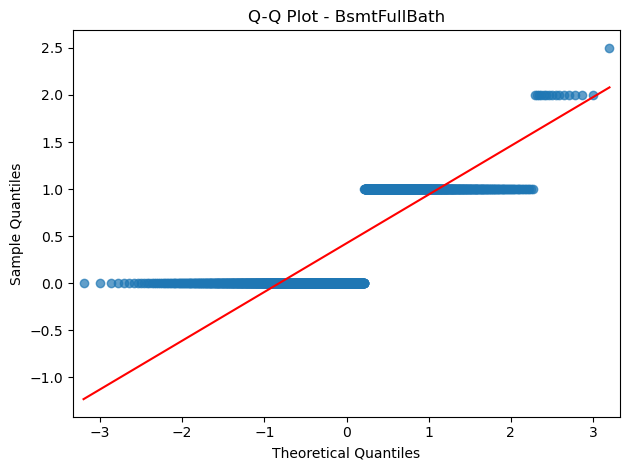

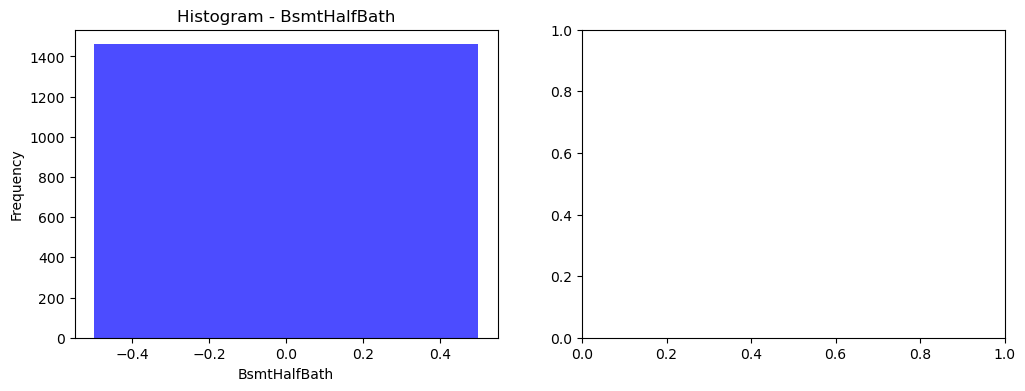

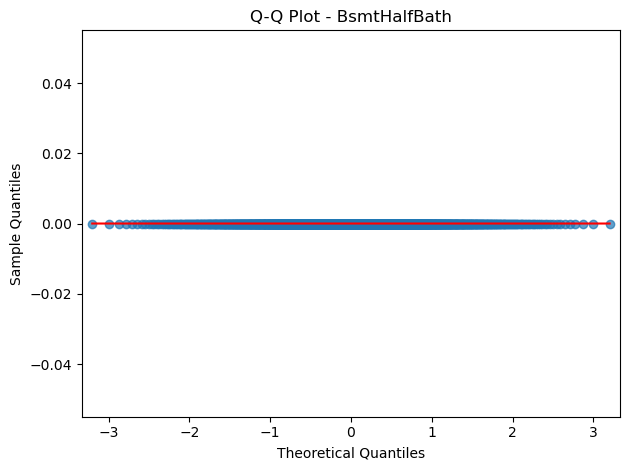

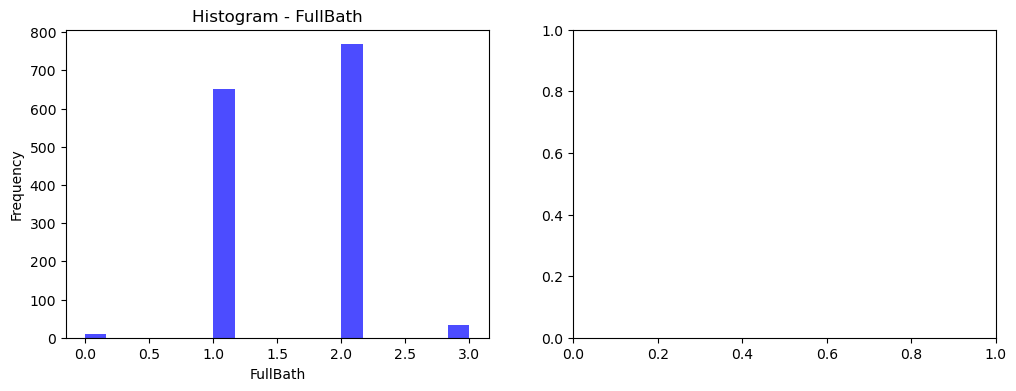

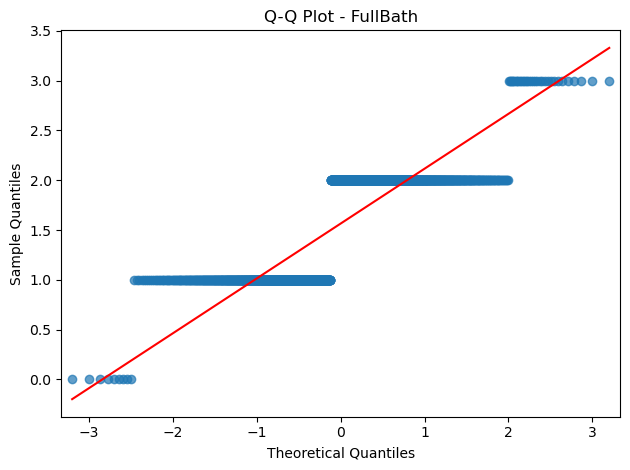

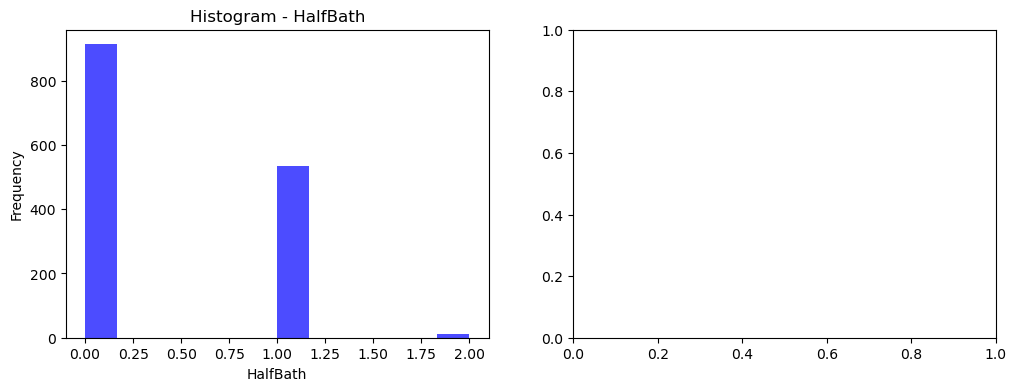

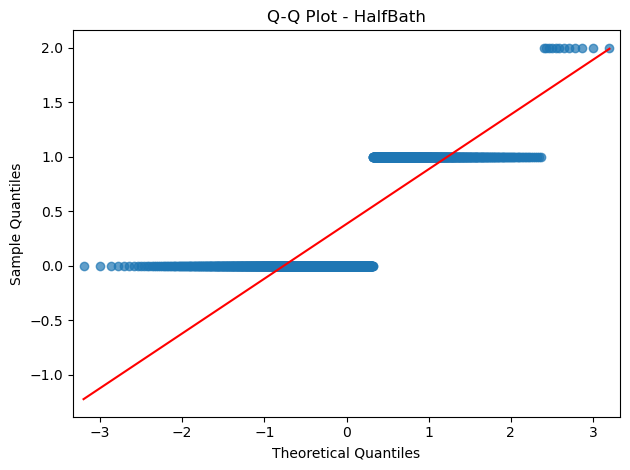

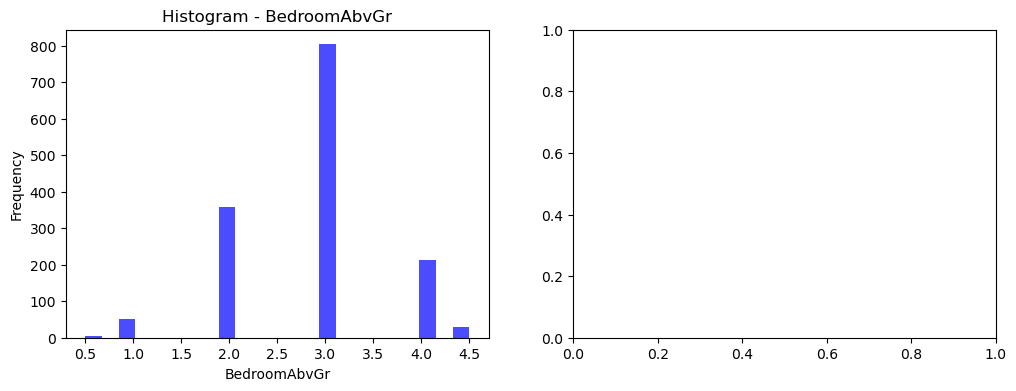

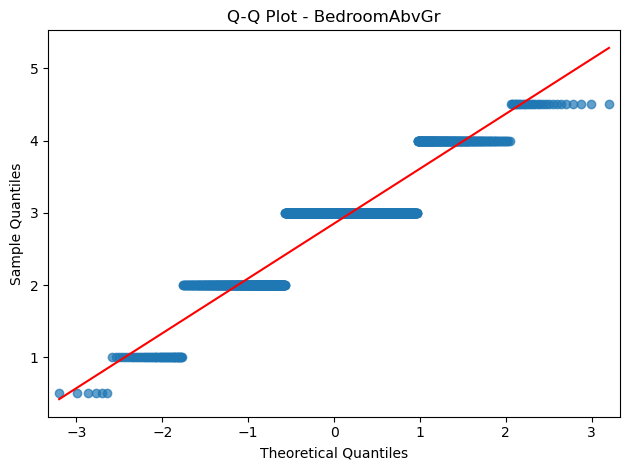

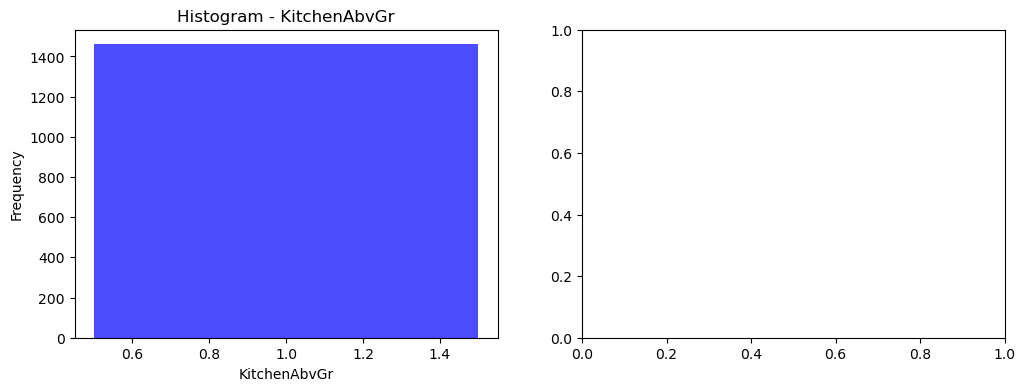

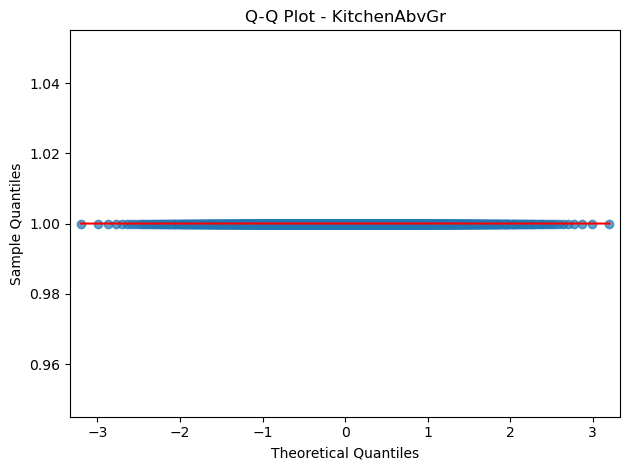

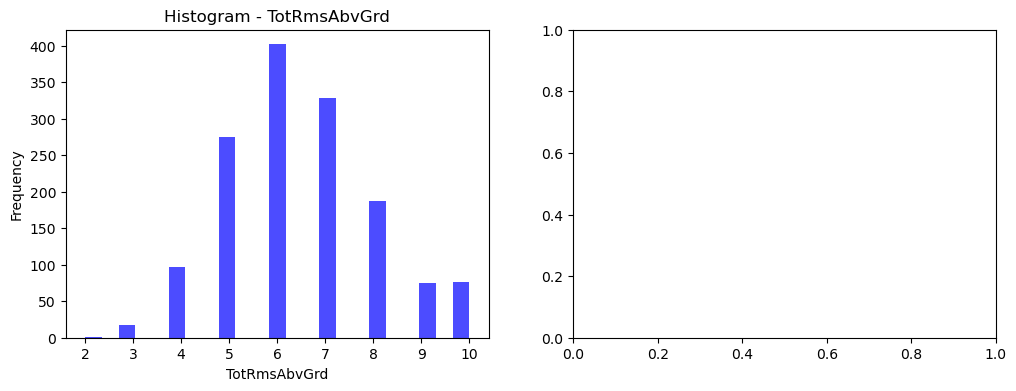

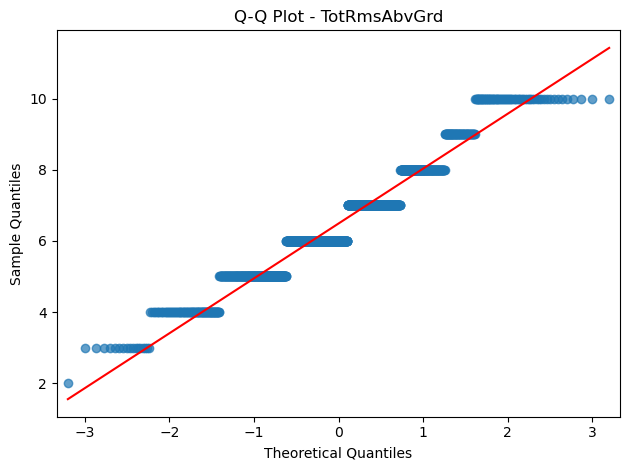

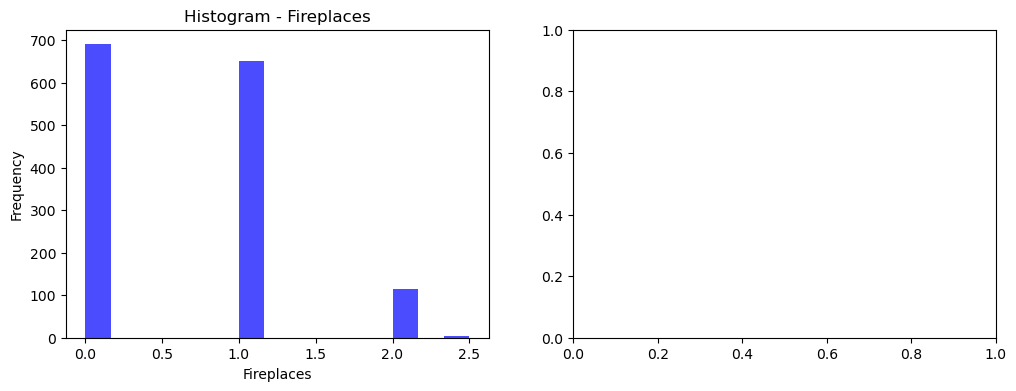

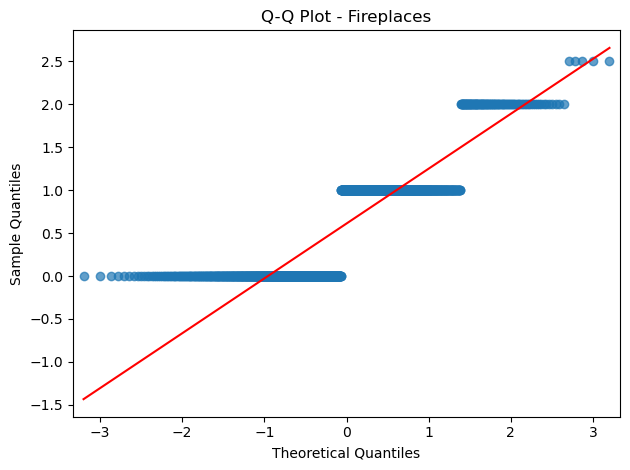

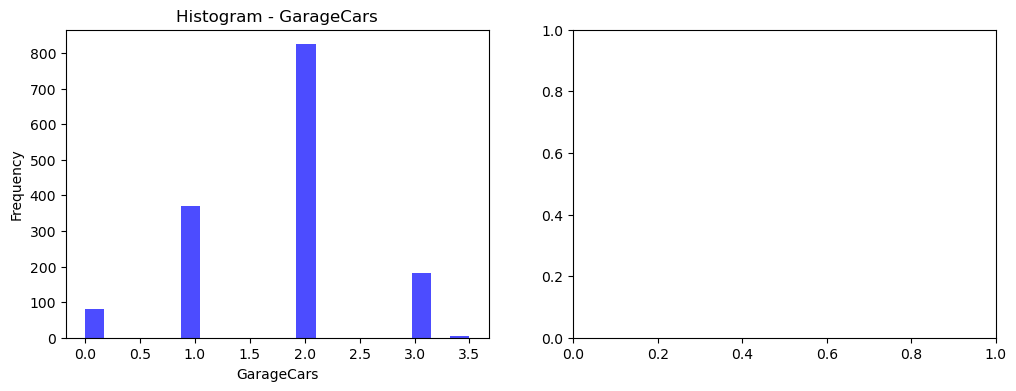

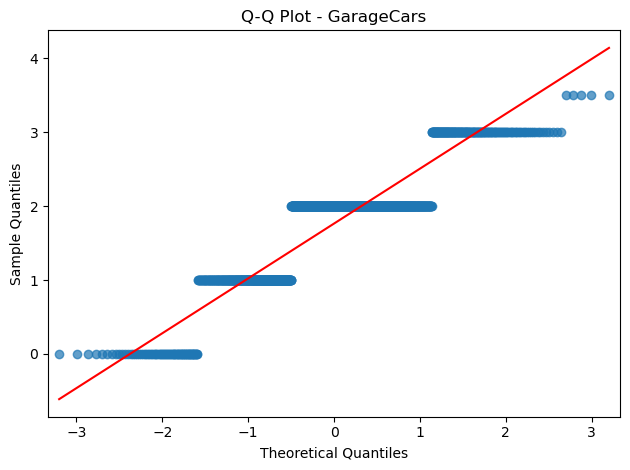

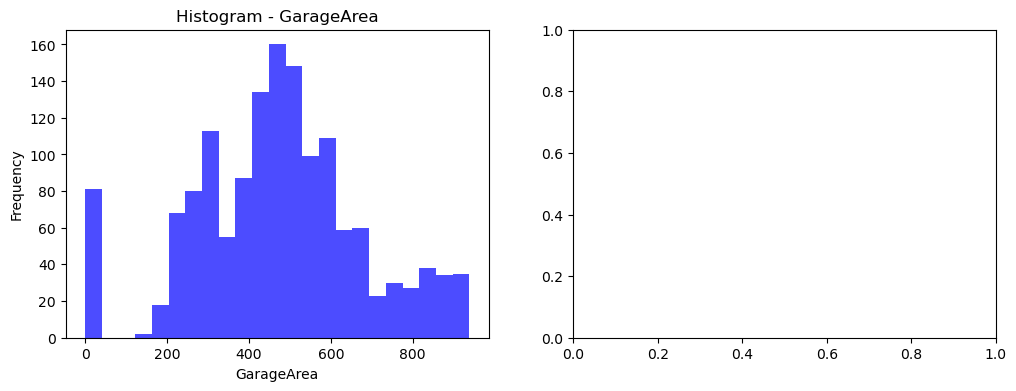

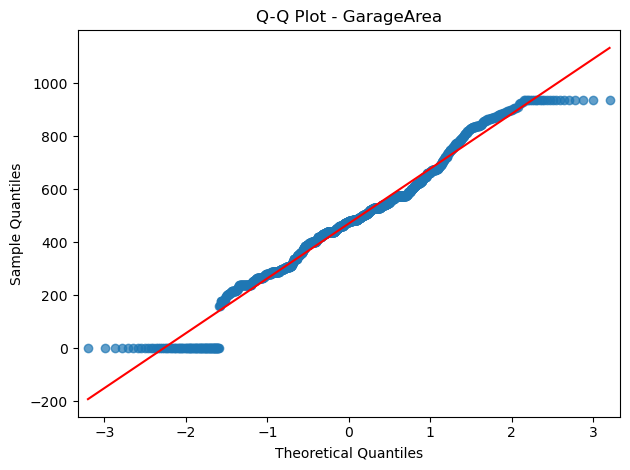

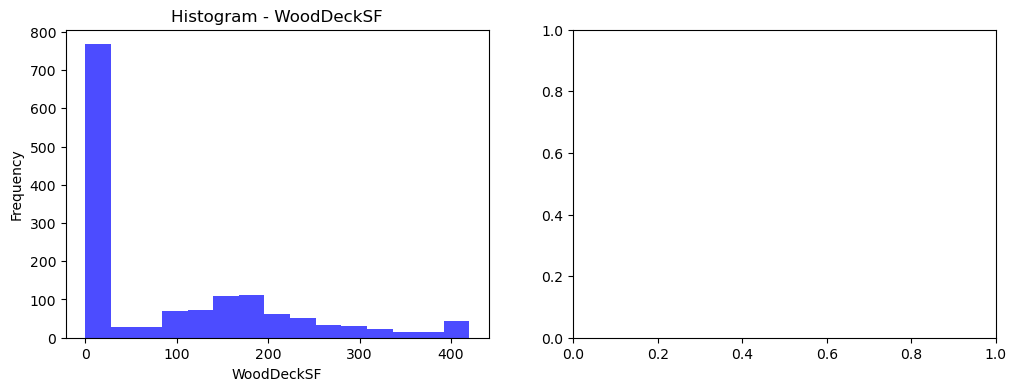

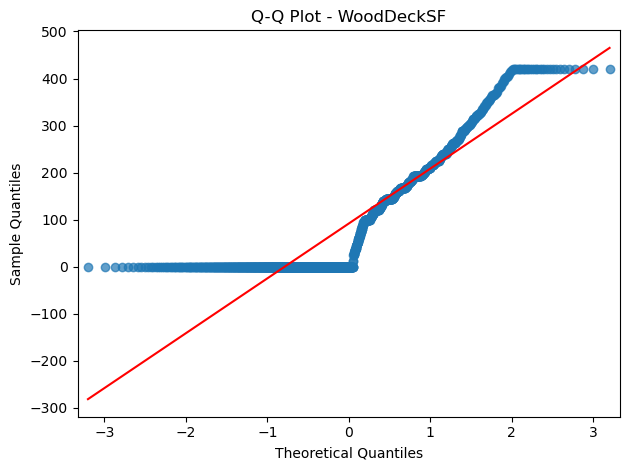

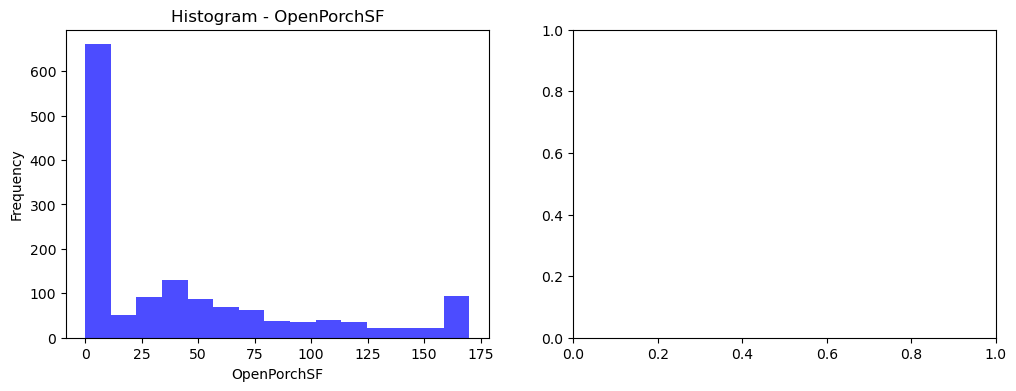

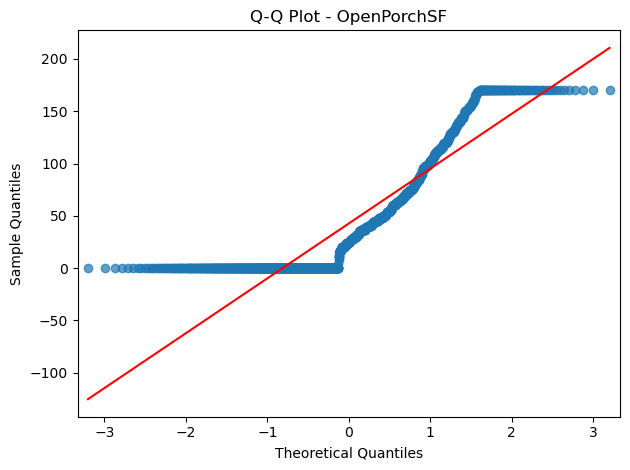

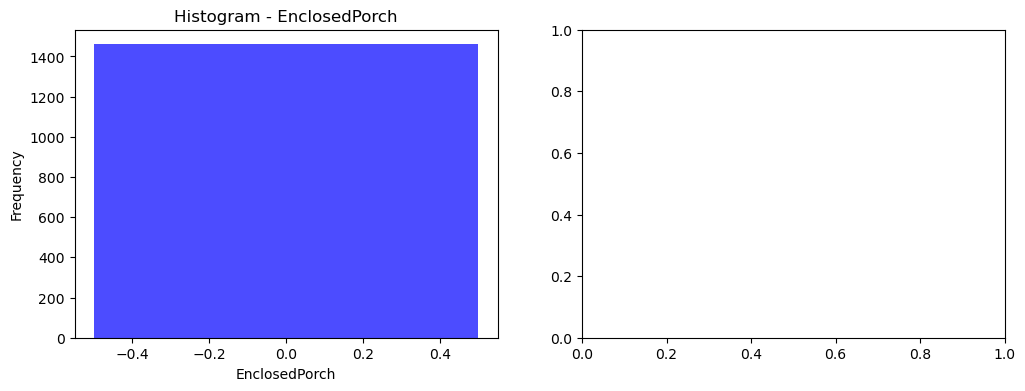

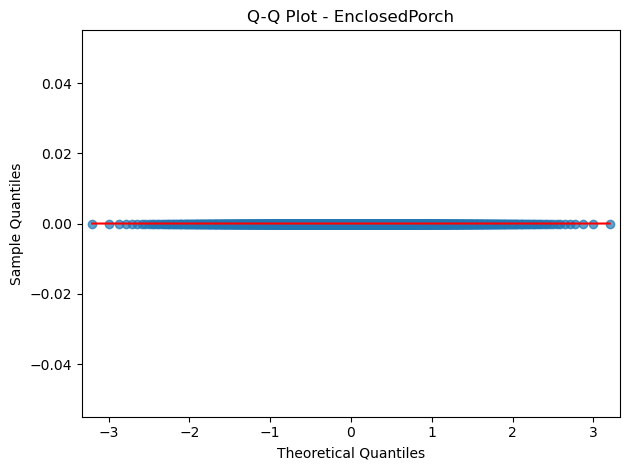

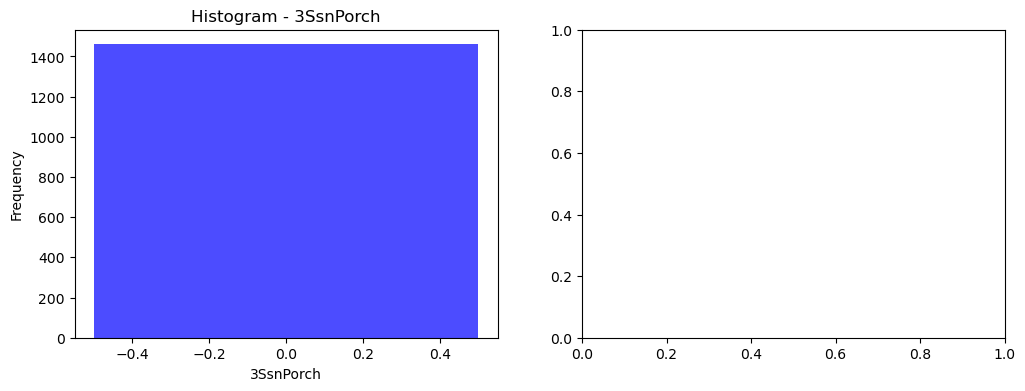

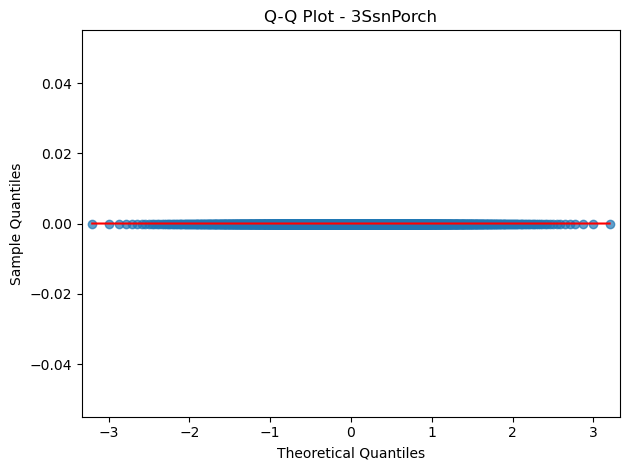

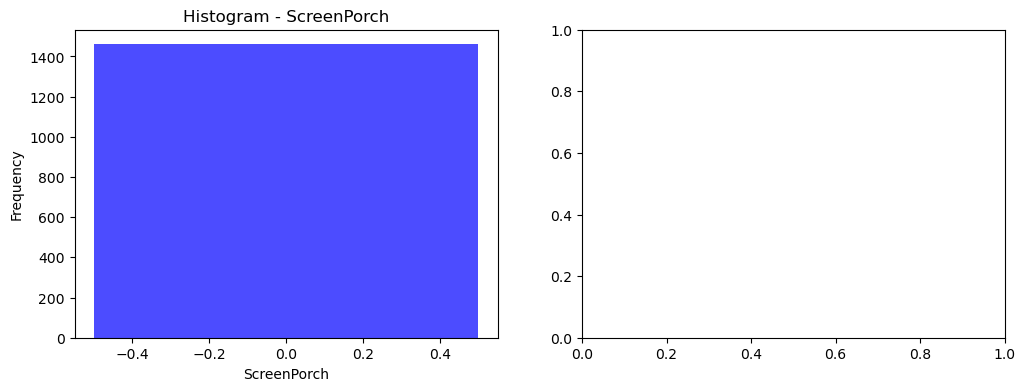

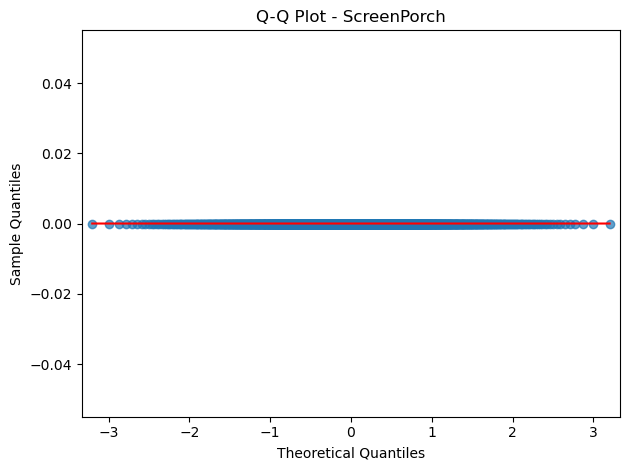

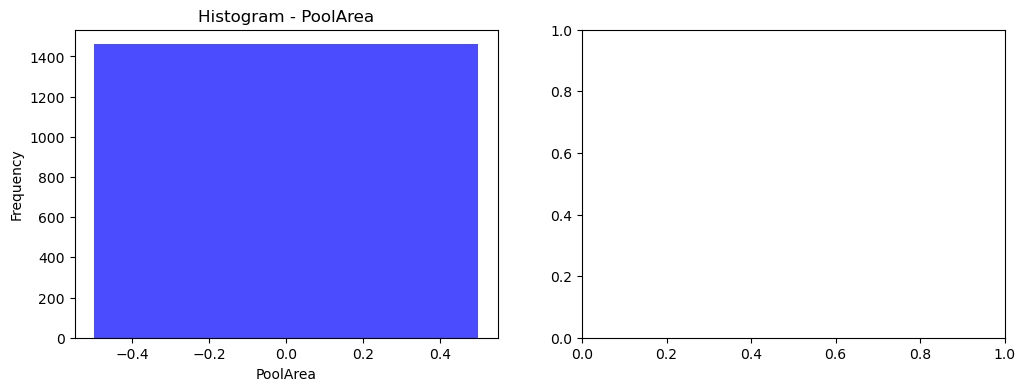

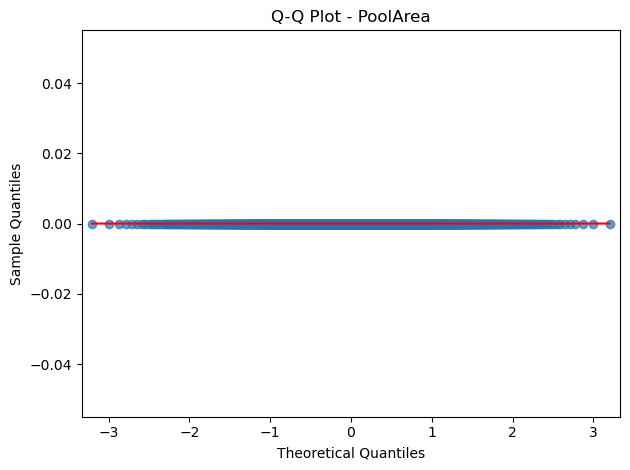

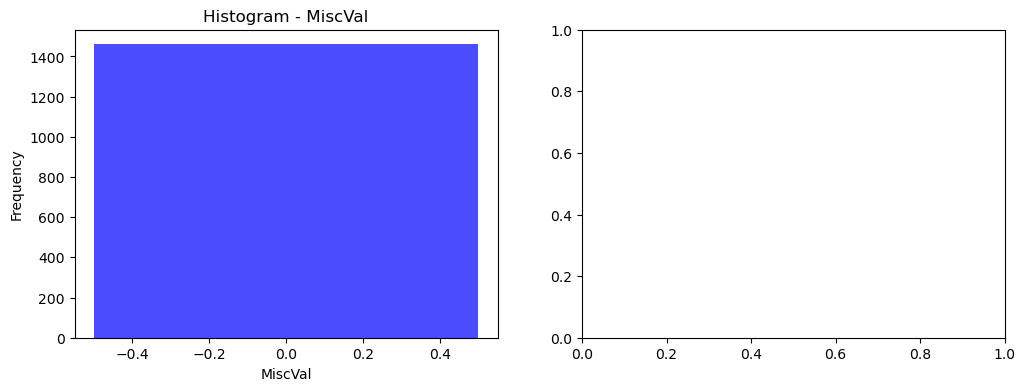

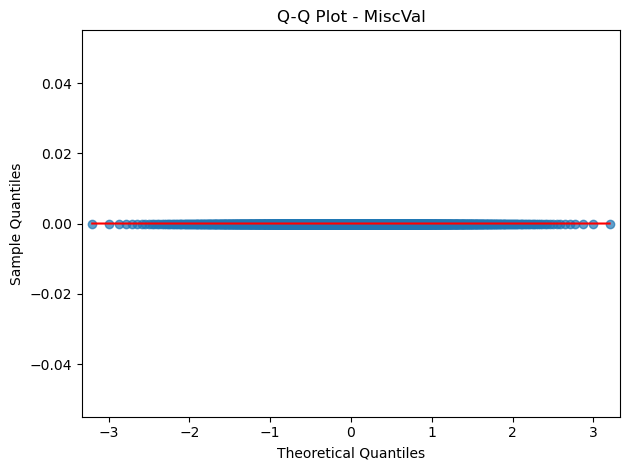

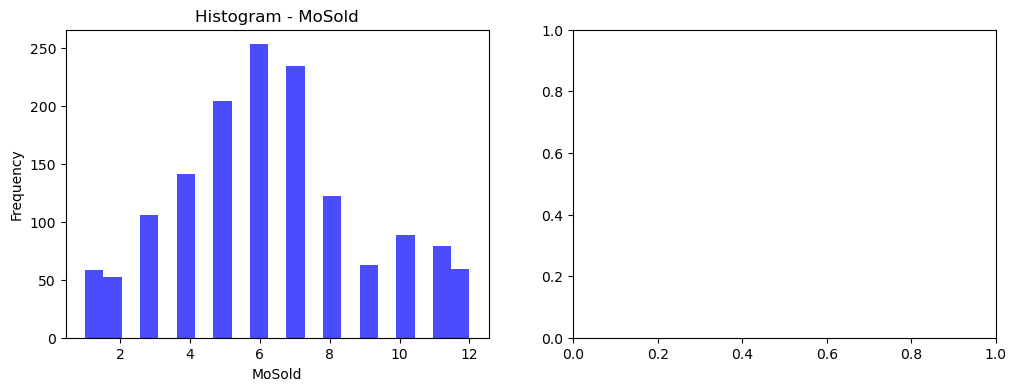

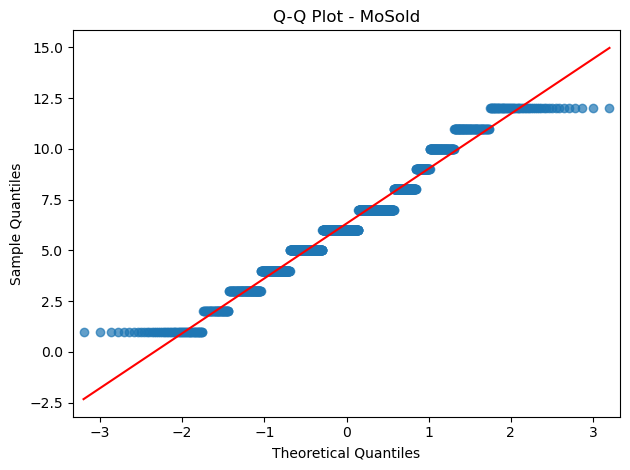

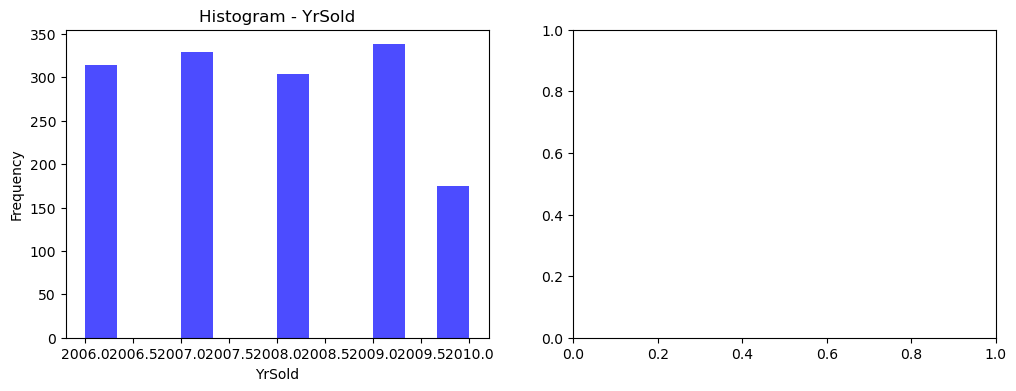

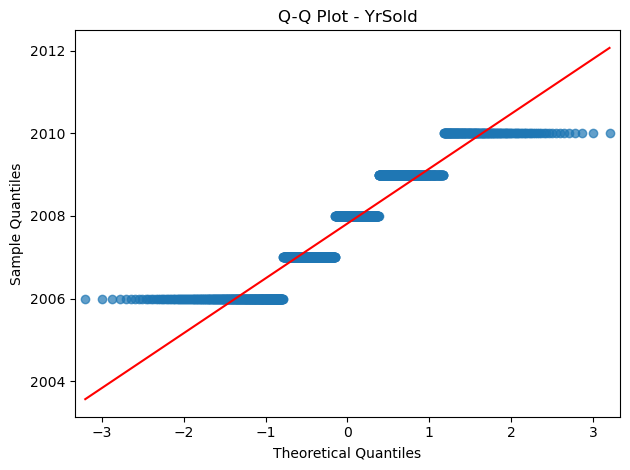

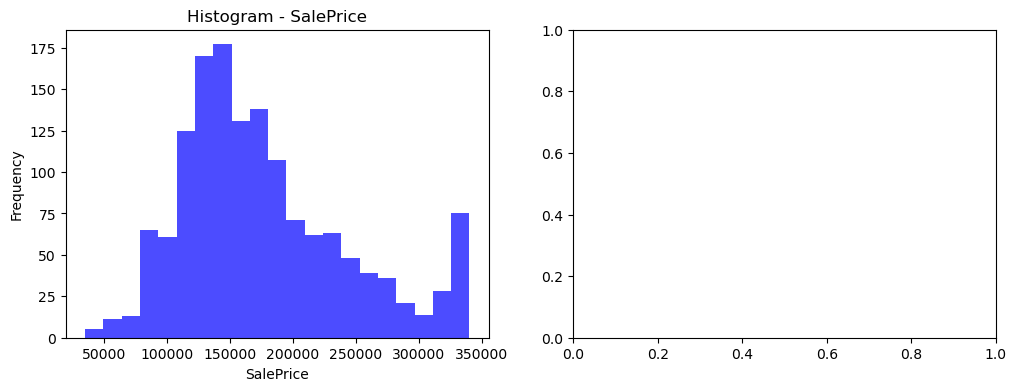

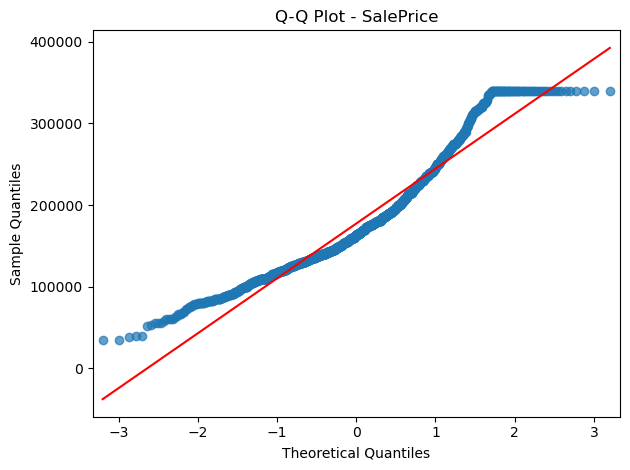

In [16]:
for column in num_columns:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins='auto', color='blue', alpha=0.7)
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    sm.qqplot(df[column], line='s', color='red', alpha=0.7)
    plt.title(f'Q-Q Plot - {column}')

    plt.tight_layout()
    plt.show()

# **Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i,j in df.isnull().sum().items():
    if df[i].dtype == object:
        df[i] = label_encoder.fit_transform(df[i])

# **Feature Selection**

In [18]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

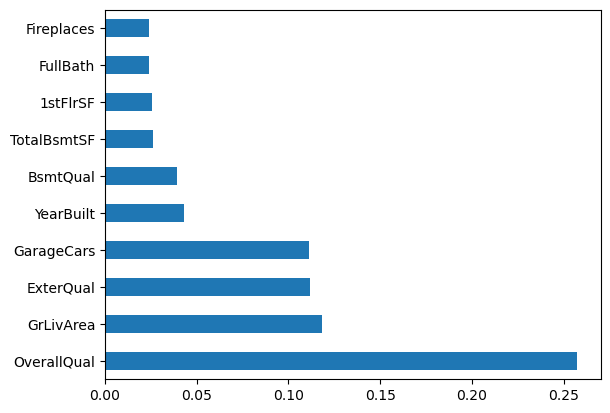

In [20]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Assuming X is your feature matrix and y is your target variable for regression

# Perform mutual information feature selection
mutual_info = mutual_info_regression(X, y)
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False, inplace=True)

In [22]:
mutual_data

OverallQual      0.566379
Neighborhood     0.515693
GrLivArea        0.456903
GarageArea       0.368053
GarageCars       0.364181
TotalBsmtSF      0.362485
YearBuilt        0.360995
BsmtQual         0.323675
ExterQual        0.317310
KitchenQual      0.316283
1stFlrSF         0.297841
MSSubClass       0.273275
FullBath         0.266103
YearRemodAdd     0.249521
TotRmsAbvGrd     0.215701
Foundation       0.200996
2ndFlrSF         0.186880
Fireplaces       0.175109
Exterior2nd      0.169364
LotArea          0.168664
HeatingQC        0.158504
OpenPorchSF      0.152489
Exterior1st      0.150391
BsmtFinSF1       0.148395
BsmtFinType1     0.144334
MSZoning         0.132378
OverallCond      0.118345
BsmtUnfSF        0.117927
WoodDeckSF       0.114567
HouseStyle       0.098402
MasVnrArea       0.096084
LotShape         0.081926
HalfBath         0.079314
BedroomAbvGr     0.078527
CentralAir       0.074407
SaleCondition    0.062571
Electrical       0.061050
BsmtExposure     0.060276
SaleType    

In [23]:
count = 1
main_feature = []
for i,j in mutual_data.items():
    if count != 10:
        main_feature.append(i)
        count+=1
    else:
        break

In [24]:
main_feature

['OverallQual',
 'Neighborhood',
 'GrLivArea',
 'GarageArea',
 'GarageCars',
 'TotalBsmtSF',
 'YearBuilt',
 'BsmtQual',
 'ExterQual']

In [27]:
X_df = df[main_feature]
y = df['SalePrice']

# **Train test split**

In [33]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model**

In [34]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

In [35]:
def test_model(model,X_train=X_train,y_train=y_train):
    cv=KFold(n_splits=3,shuffle=True,random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [36]:
import sklearn.linear_model as linear_model
lr=linear_model.LinearRegression()
test_model(lr)

[0.8741184161539207]